In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Prepare DataFrame
df = pd.read_csv('../data/BCCC-CIRA-CIC-DoHBrw-2020.csv')


In [15]:
#Divide Data

'''
FlowBytesSent,
FlowSentRate,
FlowBytesReceived,
FlowReceivedRate,
PacketLengthVariance,
PacketLengthStandardDeviation,
PacketLengthMean,
PacketLengthMedian,
PacketLengthMode,
PacketLengthSkewFromMedian,
PacketLengthSkewFromMode,
PacketLengthCoefficientofVariation,
PacketTimeVariance,
PacketTimeStandardDeviation,
PacketTimeMean,
PacketTimeMedian,
PacketTimeMode,
PacketTimeSkewFromMedian,
PacketTimeSkewFromMode,
PacketTimeCoefficientofVariation,
ResponseTimeTimeVariance,
ResponseTimeTimeStandardDeviation,
ResponseTimeTimeMean,
ResponseTimeTimeMedian,
ResponseTimeTimeMode,
ResponseTimeTimeSkewFromMedian,
ResponseTimeTimeSkewFromMode,
ResponseTimeTimeCoefficientofVariation,
Label
'''

df.head()
#print(df.head())
df.describe()
df.isnull().sum()
#print(df.isnull().sum())
df['Label'].value_counts()
#print(df['Label'].value_counts())

pd.get_dummies(df['Label'])
#print(pd.get_dummies(df['Label']))

# Assuming the target variable is 'Label'
X = df.drop('Label', axis=1)
y = df['Label']

# Convert categorical variables to numerical if needed
# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        Benign  Malicious
0         True      False
1        False       True
2        False       True
3         True      False
4         True      False
...        ...        ...
499101   False       True
499102   False       True
499103   False       True
499104    True      False
499105    True      False

[499106 rows x 2 columns]


In [8]:
#Train Model

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [9]:
#Evaluate Model

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[49910    19]
 [   29 49864]]
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     49929
   Malicious       1.00      1.00      1.00     49893

    accuracy                           1.00     99822
   macro avg       1.00      1.00      1.00     99822
weighted avg       1.00      1.00      1.00     99822

Accuracy: 0.9995191440764561


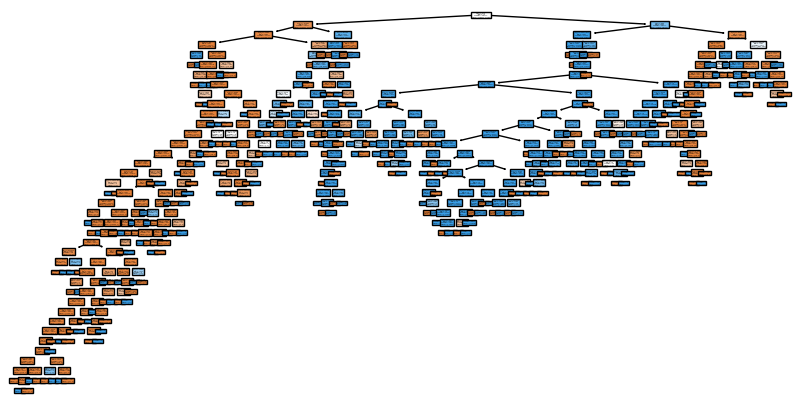

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#Visualize Decision Tree

plt.figure(figsize=(10, 5))
plot_tree(model, filled=True)
plt.show()


In [ ]:
import seaborn as sns

accuracies = [accuracy_model1, accuracy_model2, accuracy_model3] # Replace with actual accuracies
model_names = ['Decision Tree', 'Model 2', 'Model 3'] # Replace with actual model names

sns.barplot(x=model_names, y=accuracies)
plt.show()
